In [1]:
%cd /content/drive/MyDrive/"Colab Notebooks"/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
 ARO1_pearsonr_corr.csv		        ARO2特徵因子分析.ipynb
'ARO1_不可控_Feature Selection.ipynb'   R911R912_3.pptx
 ARO1_不可控_Xgboost.ipynb	       'R911R912 _ARO1_R2.xlsx'
'ARO1_可控_Feature Selection.ipynb'    'R911R912 _ARO1_R2-特徵變數標示.xlsx'
 ARO1_可控_Xgboost.ipynb	       'R911R912 _ARO1 - R3.xlsx'
 ARO1特徵因子分析.ipynb.ipynb	        R911R912.pptx
 ARO2_pearsonr_corr.csv		       'R911R912 _明志蔡教授_R2.xlsx'
'ARO2_不可控_Feature Selection.ipynb'  'R911R912 _明志蔡教授_R3-ARO2.xlsx'
 ARO2_不可控_Xgboost.ipynb	        test.csv
'ARO2_可控_Feature Selection.ipynb'     Untitled0.ipynb
 ARO2_可控_Xgboost.ipynb


In [2]:
import pandas as pd
path = "R911R912 _ARO1 - R3.xlsx"
xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)

['R911R912_TAG清單',
 'R911R912_TAG相關錶點資料(X)',
 '目標值(Y)相關錶點資料',
 'R911R912_TAG相關錶點資料(停用)']

In [3]:
df = xls.parse(sheets[1])
df.columns.values[2] = "time"
df = df.iloc[:,2:]
for i in df.columns[1:]:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

,time,ARO1-DCS-FIC_91103_1,ARO1-DCS-FI_91203,ARO1-DCS-FIC_98102_1,ARO1-DCS-FIC_98102_1.RESULT,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98302_1.RESULT,ARO1-DCS-FIC_98401_1,ARO1-DCS-FIC_98401_1.RESULT,ARO1-DCS-FIC_98403_1,ARO1-DCS-FIC_98403_1.RESULT,ARO1-DCS-FI_91701,ARO1-DCS-FIC_92001_1,ARO1-DCS-FIC_92001_1.RESULT,ARO1-DCS-FIC_91101_2,ARO1-DCS-FIC_91102_2,ARO1-DCS-FIC_91105_2,ARO1-DCS-FIC_91106_2,ARO1-DCS-FIC_91201_2,ARO1-DCS-FIC_91202_2,ARO1-DCS-FIC_91204_2,ARO1-DCS-FIC_91205_2,ARO1-DCS-FIC_98103_2,ARO1-DCS-FI_98104,ARO1-DCS-PI99801,ARO1-DCS-PDI98301A,ARO1-DCS-PDI98301,ARO1-DCS-PDI98401A,ARO1-DCS-PDI98401,ARO1-DCS-PIC_91103_2,ARO1-DCS-PIC_91203_2,ARO1-DCS-PIC_98104,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_XF,ARO1-DCS-AC_CTIME,ARO1-DCS-AC_STIME,ARO1-DCS-AC_BPOSIT,ARO1-DCS-AC_ZPOSIT,ARO1-DCS-TI91101,ARO1-DCS-TI91102,ARO1-DCS-TI91103,ARO1-DCS-TI91201,ARO1-DCS-TI91202,ARO1-DCS-TI91203,ARO1-DCS-TI98101,ARO1-DCS-TI98301,ARO1-DCS-TI98401,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,Unnamed: 55,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,Unnamed: 61,ARO1-LIMS-s909-744-C9,ARO1-LIMS-s909-744-C10+,ARO1-LIMS-S909-BR_INDEX,Unnamed: 65,新增補充錶點,ARO1-LIMS-S917-WATER,ARO1-LIMS-S916-WATER
0,638.648,638.326498,645.390457,12.753275,12.620982,224.998505,226.569753,233.111313,234.925810,10.627063,10.298245,338.809978,129.936996,131.572994,1.885369,0.401148,1.507488,0.299522,1.889085,0.398458,1.518974,0.303597,3.518285,2.526874,84.536913,0.291371,0.255862,0.095175,0.007874,8.821634,8.918269,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,12.540664,3.521895,178.537578,179.139479,178.534850,178.218629,175.364987,177.784863,172.246111,174.206662,175.822041,2.540602,2.542738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,651.542,653.593980,634.264966,12.753275,12.587158,224.998505,226.244344,233.111313,234.872984,10.627063,10.301716,338.360227,129.936996,131.473092,1.888818,0.401412,1.510603,0.299642,1.899350,0.398796,1.514563,0.303297,3.526920,2.546981,84.191297,0.295791,0.255753,0.095128,0.001296,8.783562,8.912538,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,12.978793,3.264048,178.265739,178.800611,178.838395,178.610685,175.723069,177.540527,172.597339,174.262855,175.847181,2.513337,2.541914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,648.831,647.641213,657.156365,12.753275,12.607229,224.998505,226.424603,233.111313,234.950889,10.627063,10.321101,337.969906,129.936996,131.564755,1.892267,0.401675,1.510152,0.299925,1.909615,0.399135,1.510151,0.302997,3.540352,2.537632,84.065362,0.300423,0.255600,0.095081,0.000000,8.805391,8.883338,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,13.555962,3.498006,178.424725,179.260974,178.610967,178.367909,175.580795,177.818968,172.969119,174.365563,175.872321,2.502503,2.557038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,622.012,624.454044,654.174919,12.753275,12.578797,224.998505,226.657531,233.111313,235.025767,10.627063,10.324364,338.792444,129.936996,131.542983,1.895715,0.401938,1.508051,0.300244,1.919879,0.399474,1.505740,0.302697,3.553602,2.576011,83.905619,0.305054,0.255448,0.095034,0.000000,8.811242,8.937288,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,11.735377,3.635918,178.996485,179.209042,178.708438,178.179457,175.744517,177.942545,173.289535,174.401102,175.897461,2.495342,2.545303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,671.924,668.433262,659.249929,12.753275,12.576618,224.998505,226.442403,233.111313,234.928731,10.627063,10.321405,338.792089,129.936996,131.403688,1.899164,0.402052,1.505951,0.300563,1.930144,0.399841,1.501329,0.302347,3.536068,2.516979,83.985020,0.309685,0.255295,0.094987,0.000000,8.783462,8.909147,11.800180,0.485000,120.012001,0.429839,1.540154,-0.510051,100.01000

In [20]:
df_1 = xls.parse(sheets[2])
df_1.columns.values[1] = "time"
df_1 = df_1.iloc[:71447,1:]
for i in df_1.columns[1:]:
  df_1[i] = pd.to_numeric(df_1[i],errors='coerce')

df_1

,time,ARO1-LIMS-s912-744-Ethylbz,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s912-744-o-Xylene,ARO1-DCS-PX 回收率,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
71442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['time', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-FI_91203',
       'ARO1-DCS-FIC_98102_1', 'ARO1-DCS-FIC_98102_1.RESULT',
       'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98302_1.RESULT',
       'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98401_1.RESULT',
       'ARO1-DCS-FIC_98403_1', 'ARO1-DCS-FIC_98403_1.RESULT',
       'ARO1-DCS-FI_91701', 'ARO1-DCS-FIC_92001_1',
       'ARO1-DCS-FIC_92001_1.RESULT', 'ARO1-DCS-FIC_91101_2',
       'ARO1-DCS-FIC_91102_2', 'ARO1-DCS-FIC_91105_2', 'ARO1-DCS-FIC_91106_2',
       'ARO1-DCS-FIC_91201_2', 'ARO1-DCS-FIC_91202_2', 'ARO1-DCS-FIC_91204_2',
       'ARO1-DCS-FIC_91205_2', 'ARO1-DCS-FIC_98103_2', 'ARO1-DCS-FI_98104',
       'ARO1-DCS-PI99801', 'ARO1-DCS-PDI98301A', 'ARO1-DCS-PDI98301',
       'ARO1-DCS-PDI98401A', 'ARO1-DCS-PDI98401', 'ARO1-DCS-PIC_91103_2',
       'ARO1-DCS-PIC_91203_2', 'ARO1-DCS-PIC_98104', 'ARO1-DCS-AC_A_FA',
       'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_L3_A',
       'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_XF', 'ARO1-DCS-AC_CTIM

In [6]:
dic = {
    "ARO1-DCS-FIC_91103_1":"二號到一號吸附室流量",
    "ARO1-DCS-FI_91203":"一號到二號吸附室流量",
    "ARO1-DCS-FIC_98302_1":"RV進料油量",
    "ARO1-DCS-FIC_98401_1":"RV脫附劑流量",
    "ARO1-DCS-FI_91701":"萃餘塔流量",
    "ARO1-DCS-FIC_92001_1":"萃取塔流量",
    "ARO1-LIMS-S704-BR_INDEX":"進料溴指數",
    "ARO1-LIMS-s704-744-C9":"進料A9含量",
    "ARO1-LIMS-s704-744-C10+":"進料A10含量",
    "ARO1-LIMS-S704-WATER":"進料含水量",
    "ARO1-LIMS-S704-TS":"進料硫含量",
    "ARO1-LIMS-S917-WATER":"萃餘油水份含量",
    "ARO1-LIMS-S916-WATER":"萃取油水份含量",
    "ARO1-DCS-PDI_91102":"R911吸附室壓差",
    "ARO1-DCS-PDI_91202":"R912吸附室壓差",
    "ARO1-DCS-AC_A_FA":"FA",
    "ARO1-DCS-AC_HF":"HA",
    "ARO1-DCS-AC_L2_A":"L2",
    "ARO1-DCS-AC_L3_A":"L3",
    "ARO1-DCS-AC_L4_A":"L4",
    "ARO1-DCS-AC_XF":"XF",
    "ARO1-LIMS-s912-744-p-Xylene":"PX產品PX含量",
    "ARO1-LIMS-s912-744-m-Xylene":"PX產品MX含量",
    "ARO1-LIMS-s917-744-p-Xylene":"萃取油PX含量",
    "ARO1-LIMS-s916-744-p-Xylene":"萃餘油PX含量",
    "ARO1-DCS-PX 回收率":"PX回收率"
}

In [21]:
s_col = ["ARO1-DCS-FIC_91103_1", "ARO1-DCS-FI_91203", "ARO1-DCS-FIC_98302_1", "ARO1-DCS-FIC_98401_1", "ARO1-DCS-FI_91701", "ARO1-DCS-FIC_92001_1",
     "ARO1-LIMS-S704-BR_INDEX", "ARO1-LIMS-s704-744-C9", "ARO1-LIMS-s704-744-C10+", "ARO1-LIMS-S704-WATER",
     "ARO1-LIMS-S704-TS", "ARO1-LIMS-S917-WATER", "ARO1-LIMS-S916-WATER",
     "ARO1-DCS-PDI_91102", "ARO1-DCS-PDI_91202"]

a_col = ["ARO1-DCS-AC_A_FA", "ARO1-DCS-AC_HF", "ARO1-DCS-AC_L2_A",
     "ARO1-DCS-AC_L3_A", "ARO1-DCS-AC_L4_A", "ARO1-DCS-AC_XF"]


y_col= ["ARO1-LIMS-s912-744-p-Xylene", "ARO1-LIMS-s912-744-m-Xylene",
    "ARO1-LIMS-s917-744-p-Xylene", "ARO1-LIMS-s916-744-p-Xylene", "ARO1-DCS-PX 回收率"]

col = s_col + a_col + y_col

df_2 = df[s_col + a_col].join(df_1[y_col])

y_col = s_col[13:15] + y_col
s_col = s_col[:13]
x_col = s_col + a_col

df_2

,ARO1-DCS-FIC_91103_1,ARO1-DCS-FI_91203,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-DCS-FI_91701,ARO1-DCS-FIC_92001_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-LIMS-S917-WATER,ARO1-LIMS-S916-WATER,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_XF,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
0,638.326498,645.390457,224.998505,233.111313,338.809978,129.936996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.540602,2.542738,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,NaN,NaN,NaN,NaN,NaN
1,653.593980,634.264966,224.998505,233.111313,338.360227,129.936996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.513337,2.541914,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,NaN,NaN,NaN,NaN,NaN
2,647.641213,657.156365,224.998505,233.111313,337.969906,129.936996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.502503,2.557038,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,NaN,NaN,NaN,NaN,NaN
3,624.454044,654.174919,224.998505,233.111313,338.792444,129.936996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.495342,2.545303,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,NaN,NaN,NaN,NaN,NaN
4,668.433262,659.249929,224.998505,233.111313,338.792089,129.936996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.537570,2.538941,0.485000,120.012001,0.429839,1.540154,-0.510051,100.010002,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71443,725.544836,731.913226,254.993500,271.035095,385.341946,149.882996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.097940,3.111554,0.482027,120.012001,0.398877,1.540062,-0.579923,102.010201,NaN,NaN,NaN,NaN,NaN
71444,721.380853,732.752378,254.993500,271.035095,385.452021,149.882996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.097372,3.100117,0.482027,120.012001,0.398877,1.540062,-0.579923,102.010201,NaN,NaN,NaN,NaN,NaN
71445,721.611704,734.140090,254.993500,271.035095,385.664590,149.882996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.057514,3.120830,0.482027,120.012001,0.398877,1.540062,-0.579923,102.010201,NaN,NaN,NaN,NaN,NaN
71446,721.004848,731.883648,254.993500,271.035095,385.608445,149.882996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.055393,3.107769,0.482027,120.012001,0.398877,1.540062,-0.579923,102.010201,NaN,NaN,NaN,NaN,NaN


In [22]:
from sklearn.preprocessing import MinMaxScaler

df_2[["ARO1-DCS-FIC_91103_1", "ARO1-DCS-FI_91203", "ARO1-DCS-FIC_98302_1", "ARO1-DCS-FIC_98401_1"]] = df_2[["ARO1-DCS-FIC_91103_1", "ARO1-DCS-FI_91203", "ARO1-DCS-FIC_98302_1", "ARO1-DCS-FIC_98401_1"]] / 381237

scaler = MinMaxScaler()
scaler.fit(df_2[x_col])
df_2[x_col] = scaler.transform(df_2[x_col])
df_2[x_col]

,ARO1-DCS-FIC_91103_1,ARO1-DCS-FI_91203,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-DCS-FI_91701,ARO1-DCS-FIC_92001_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-LIMS-S917-WATER,ARO1-LIMS-S916-WATER,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_XF
0,0.708236,0.717220,0.881728,0.860078,0.838385,0.721872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516103,0.923255,0.664755,0.737276,0.863700,0.980392
1,0.725176,0.704856,0.881728,0.860078,0.837272,0.721872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516103,0.923255,0.664755,0.737276,0.863700,0.980392
2,0.718571,0.730295,0.881728,0.860078,0.836306,0.721872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516103,0.923255,0.664755,0.737276,0.863700,0.980392
3,0.692845,0.726982,0.881728,0.860078,0.838341,0.721872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516103,0.923255,0.664755,0.737276,0.863700,0.980392
4,0.741641,0.732622,0.881728,0.860078,0.838340,0.721872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516103,0.923255,0.664607,0.737276,0.863700,0.980392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71443,0.805007,0.813373,0.999273,1.000000,0.953528,0.832683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510544,0.923255,0.560594,0.737234,0.830864,1.000000
71444,0.800387,0.814305,0.999273,1.000000,0.953800,0.832683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510544,0.923255,0.560594,0.737234,0.830864,1.000000
71445,0.800643,0.815847,0.999273,1.000000,0.954326,0.832683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510544,0.923255,0.560594,0.737234,0.830864,1.000000
71446,0.799970,0.813340,0.999273,1.000000,0.954187,0.832683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510544,0.923255,0.560594,0.737234,0.830864,1.000000


In [25]:
df_2_1_8 = df_2[7::8]
df_2_1_8

,ARO1-DCS-FIC_91103_1,ARO1-DCS-FI_91203,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-DCS-FI_91701,ARO1-DCS-FIC_92001_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-LIMS-S917-WATER,ARO1-LIMS-S916-WATER,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_XF,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
7,0.721289,0.760452,0.881728,0.860078,0.838836,0.721872,0.077020,0.017049,0.0,0.056437,0.005376,0.562197,0.313341,2.528644,2.541595,0.516103,0.923255,0.662285,0.737276,0.863700,0.980392,99.795898,604.0,48.698700,0.0395,NaN
15,0.754121,0.730942,0.881728,0.860078,0.838231,0.723072,0.077020,0.018470,0.0,0.056437,0.005376,NaN,NaN,2.562995,2.535559,0.516103,0.923255,0.655934,0.737276,0.863700,0.980392,99.846497,584.0,NaN,NaN,NaN
23,0.720062,0.733063,0.881728,0.860078,0.837820,0.724272,0.090909,0.023206,0.0,0.066855,0.010753,NaN,NaN,2.490574,2.558351,0.516103,0.923255,0.652056,0.737276,0.863700,0.980392,99.843201,612.0,NaN,NaN,NaN
31,0.724353,0.730124,0.881728,0.860078,0.837220,0.724272,0.066288,0.022259,0.0,0.062384,0.010753,0.584983,0.265030,2.555208,2.509361,0.516103,0.923255,0.652056,0.737276,0.863700,0.980392,99.835800,622.0,48.840199,0.1322,NaN
39,0.717455,0.755524,0.881728,0.860078,0.838774,0.724272,0.066288,0.013024,0.0,0.062384,0.010753,NaN,NaN,2.559671,2.519720,0.516103,0.923255,0.652056,0.737276,0.863700,0.980392,99.822998,669.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71415,0.800658,0.812602,0.999273,1.000000,0.953580,0.832683,0.046717,0.020838,0.0,0.063270,0.010753,NaN,NaN,3.070490,3.069563,0.510544,0.923255,0.560594,0.737234,0.830864,1.000000,99.722000,1586.0,NaN,NaN,96.334282
71423,0.800534,0.813526,0.999273,1.000000,0.953922,0.832683,0.046086,0.021075,0.0,0.046777,0.005376,NaN,NaN,3.091588,3.089269,0.510544,0.923255,0.560594,0.737234,0.830864,1.000000,99.722504,1564.0,NaN,NaN,96.361374
71431,0.807640,0.810764,0.999273,1.000000,0.953182,0.832683,0.037247,0.015865,0.0,0.085414,0.005376,0.563566,0.300707,3.070895,3.085334,0.510544,0.923255,0.560594,0.737234,0.830864,1.000000,99.724098,1570.0,36.984600,0.1525,96.388466
71439,0.807421,0.811205,0.999273,1.000000,0.953387,0.832683,0.037247,0.021312,0.0,0.085414,0.005376,NaN,NaN,3.089878,3.090815,0.510544,0.923255,0.560594,0.737234,0.830864,1.000000,99.724197,1580.0,NaN,NaN,96.411087


In [24]:
df_2_1_24 = df_2[7::24]
df_2_1_24

,ARO1-DCS-FIC_91103_1,ARO1-DCS-FI_91203,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-DCS-FI_91701,ARO1-DCS-FIC_92001_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-LIMS-S917-WATER,ARO1-LIMS-S916-WATER,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_XF,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
7,0.721289,0.760452,0.881728,0.860078,0.838836,0.721872,0.077020,0.017049,0.0,0.056437,0.005376,0.562197,0.313341,2.528644,2.541595,0.516103,0.923255,0.662285,0.737276,0.863700,0.980392,99.795898,604.0,48.698700,0.0395,NaN
31,0.724353,0.730124,0.881728,0.860078,0.837220,0.724272,0.066288,0.022259,0.0,0.062384,0.010753,0.584983,0.265030,2.555208,2.509361,0.516103,0.923255,0.652056,0.737276,0.863700,0.980392,99.835800,622.0,48.840199,0.1322,NaN
55,0.702027,0.742926,0.881728,0.860078,0.839515,0.724664,0.047348,0.011130,0.0,0.088029,0.005376,0.584983,0.265030,2.528962,2.526748,0.516103,0.923255,0.650510,0.737276,0.863700,0.980392,99.822998,635.0,48.840199,0.1322,NaN
79,0.730056,0.723426,0.881728,0.851222,0.835035,0.717718,0.082071,0.011603,0.0,0.068331,0.005376,0.584983,0.265030,2.470622,2.488317,0.516103,0.923255,0.644132,0.737276,0.863700,0.980392,99.824203,635.0,48.840199,0.1322,NaN
103,0.700352,0.704973,0.881728,0.847680,0.833106,0.714329,0.034722,0.013261,0.0,0.081386,0.005376,0.644876,0.330570,2.494950,2.453564,0.516103,0.923255,0.644753,0.737276,0.863700,0.980392,99.775703,657.0,43.925701,0.3068,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71335,0.804288,0.816373,0.999273,1.000000,0.953724,0.831941,0.072601,0.006630,0.0,0.076915,0.010753,0.529884,0.301820,3.066369,3.091433,0.510544,0.923255,0.563192,0.737234,0.830864,1.000000,99.732300,1535.0,41.248501,1.1338,95.606926
71359,0.800701,0.808237,0.999273,1.000000,0.952577,0.833283,0.072601,0.006630,0.0,0.103088,0.016129,0.529884,0.301820,3.086484,3.062740,0.510544,0.923255,0.560268,0.737234,0.830864,1.000000,99.734703,1535.0,41.248501,1.1338,96.000893
71383,0.804652,0.813932,0.999273,1.000000,0.952883,0.834807,0.070076,0.006394,0.0,0.092796,0.010753,0.529884,0.301820,3.060587,3.081275,0.510544,0.923255,0.554036,0.737234,0.830864,1.000000,99.731201,1544.0,41.248501,1.1338,96.129875
71407,0.806790,0.813818,0.999273,1.000000,0.954075,0.832680,0.046717,0.016813,0.0,0.063270,0.010753,0.529884,0.301820,3.082325,3.097066,0.510544,0.923255,0.561254,0.737234,0.830864,1.000000,99.726196,1554.0,41.248501,1.1338,96.325066


In [26]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  rownames = [dic[i] for i in mis_val_table_ren_columns.index.to_list()]
  mis_val_table_ren_columns.index = rownames

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_2)
missing_values.head(26)

Your selected dataframe has 26 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
PX回收率,68561,96.0
萃餘油PX含量,68471,95.8
萃取油PX含量,68471,95.8
萃餘油水份含量,68471,95.8
萃取油水份含量,68471,95.8
PX產品MX含量,62518,87.5
PX產品PX含量,62518,87.5
進料溴指數,62517,87.5
進料A9含量,62517,87.5
進料A10含量,62517,87.5


In [27]:
missing_values = missing_values_table(df_2_1_8)
missing_values.head(26)

Your selected dataframe has 26 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
PX回收率,6044,67.7
萃餘油PX含量,5954,66.7
萃取油PX含量,5954,66.7
萃餘油水份含量,5954,66.7
萃取油水份含量,5954,66.7
HA,11,0.1
XF,11,0.1
L4,11,0.1
L3,11,0.1
L2,11,0.1


In [28]:
missing_values = missing_values_table(df_2_1_24)
missing_values.head(26)

Your selected dataframe has 26 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
PX回收率,2014,67.7
二號到一號吸附室流量,4,0.1
一號到二號吸附室流量,4,0.1
RV進料油量,4,0.1
RV脫附劑流量,4,0.1
萃餘塔流量,4,0.1
萃取塔流量,4,0.1
R911吸附室壓差,4,0.1
R912吸附室壓差,4,0.1
FA,4,0.1


<font size = 5>1.Removing features with low variance</font>

In [29]:
import statistics as stat
print("df_2:")
for c in df_2.columns.tolist():
  varianceNb = stat.variance(df_2[c].dropna(axis="index"))
  print(dic[c],'變異數 : ', varianceNb)

df_2:
二號到一號吸附室流量 變異數 :  0.029135434133824564
一號到二號吸附室流量 變異數 :  0.028587833401667824
RV進料油量 變異數 :  0.04284038068245246
RV脫附劑流量 變異數 :  0.04045564059435772
萃餘塔流量 變異數 :  0.03770901291837432
萃取塔流量 變異數 :  0.026978814194748298
進料溴指數 變異數 :  0.008058711775828535
進料A9含量 變異數 :  0.00026205090138902603
進料A10含量 變異數 :  0.00012504634852492907
進料含水量 變異數 :  0.0016016317292430844
進料硫含量 變異數 :  0.0006867742020431185
萃餘油水份含量 變異數 :  0.008449501368922769
萃取油水份含量 變異數 :  0.004538849222659245
R911吸附室壓差 變異數 :  0.3319194798405819
R912吸附室壓差 變異數 :  0.3273181185624496
FA 變異數 :  0.00311352277861694
HA 變異數 :  0.0014201572739945226
L2 變異數 :  0.003491909898966242
L3 變異數 :  0.0012436137441977125
L4 變異數 :  0.001329072392100186
XF 變異數 :  0.0021270048573944576
PX產品PX含量 變異數 :  2204596.0334912324
PX產品MX含量 變異數 :  3032059.058088832
萃取油PX含量 變異數 :  53.02002832887048
萃餘油PX含量 變異數 :  4.383743369481475
PX回收率 變異數 :  8.793893901700063


In [31]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

def SELECTKBEST(data, k, x_col, y_col, dic):
  
  """
  Suppose, we select 5 features with top 5 Fisher scores
  New dataframe with the selected features for later use in the classifier. fit() method works too, 
  if you want only the feature names and their corresponding scores
  """

  table = data[x_col + [y_col]].dropna()
  selector = SelectKBest(f_regression, k = k)
  X_new = selector.fit_transform(table.loc[:,x_col], table.loc[:,y_col])
  names = table.loc[:,x_col].columns.values[selector.get_support()]
  names= [dic[i] for i in names.tolist()]
  scores = selector.scores_[selector.get_support()]
  names_scores = list(zip(names, [dic[y_col] for j in range(k)], scores))
  ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', "target_name",'F_Scores'])
  #Sort the dataframe for better visualization
  ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
  x_new = ns_df_sorted.reset_index(inplace = False).iloc[:,1:]
  
  return x_new

In [32]:
print("R911吸附室壓差:")
display(SELECTKBEST(data = df_2, k = 13, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91102', dic = dic))
print("\nR912吸附室壓差:")
display(SELECTKBEST(data = df_2, k = 13, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91202', dic = dic))
print("\nPX產品PX含量:")
display(SELECTKBEST(data = df_2, k = 15, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s912-744-p-Xylene', dic = dic))
print("\nPX產品MX含量:")
display(SELECTKBEST(data = df_2, k = 17, x_col = x_col[0:4] + x_col[6:], y_col = "ARO1-LIMS-s912-744-m-Xylene", dic = dic))
print("\n萃取油PX含量:")
display(SELECTKBEST(data = df_2, k = 15, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s917-744-p-Xylene', dic = dic))
print("\n萃餘油PX含量:")
display(SELECTKBEST(data = df_2, k = 15, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s916-744-p-Xylene', dic = dic))
print("\nPX回收率:")
display(SELECTKBEST(data = df_2, k = 15, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-DCS-PX 回收率', dic = dic))

R911吸附室壓差:


,Feat_names,target_name,F_Scores
0,一號到二號吸附室流量,R911吸附室壓差,10581.935135
1,二號到一號吸附室流量,R911吸附室壓差,10580.144530
2,RV進料油量,R911吸附室壓差,10516.899520
3,萃餘塔流量,R911吸附室壓差,10223.052208
4,RV脫附劑流量,R911吸附室壓差,9918.962290
5,萃取塔流量,R911吸附室壓差,5689.961492
6,進料溴指數,R911吸附室壓差,157.423923
7,進料硫含量,R911吸附室壓差,4.494171
8,萃取油水份含量,R911吸附室壓差,1.907051
9,進料含水量,R911吸附室壓差,1.821877



R912吸附室壓差:


,Feat_names,target_name,F_Scores
0,萃餘塔流量,R912吸附室壓差,16338.644277
1,RV進料油量,R912吸附室壓差,16124.544771
2,一號到二號吸附室流量,R912吸附室壓差,15975.665584
3,RV脫附劑流量,R912吸附室壓差,15596.247702
4,二號到一號吸附室流量,R912吸附室壓差,14664.972601
5,萃取塔流量,R912吸附室壓差,7842.318864
6,進料溴指數,R912吸附室壓差,139.363655
7,進料A9含量,R912吸附室壓差,7.219892
8,進料硫含量,R912吸附室壓差,3.255350
9,萃取油水份含量,R912吸附室壓差,3.035570



PX產品PX含量:


,Feat_names,target_name,F_Scores
0,進料溴指數,PX產品PX含量,1.592029
1,RV進料油量,PX產品PX含量,0.380047
2,RV脫附劑流量,PX產品PX含量,0.365503
3,二號到一號吸附室流量,PX產品PX含量,0.143009
4,L4,PX產品PX含量,0.073404
5,FA,PX產品PX含量,0.068099
6,進料A9含量,PX產品PX含量,0.052855
7,L2,PX產品PX含量,0.038340
8,一號到二號吸附室流量,PX產品PX含量,0.015138
9,L3,PX產品PX含量,0.009775



PX產品MX含量:


,Feat_names,target_name,F_Scores
0,進料A9含量,PX產品MX含量,23.279029
1,L2,PX產品MX含量,17.711596
2,L4,PX產品MX含量,8.750909
3,萃取油水份含量,PX產品MX含量,4.359261
4,RV脫附劑流量,PX產品MX含量,1.959177
5,FA,PX產品MX含量,1.792974
6,進料硫含量,PX產品MX含量,1.029720
7,一號到二號吸附室流量,PX產品MX含量,0.790828
8,進料含水量,PX產品MX含量,0.595005
9,RV進料油量,PX產品MX含量,0.545970



萃取油PX含量:


,Feat_names,target_name,F_Scores
0,進料A9含量,萃取油PX含量,20.711658
1,L2,萃取油PX含量,17.237919
2,FA,萃取油PX含量,8.516707
3,L3,萃取油PX含量,4.350117
4,進料硫含量,萃取油PX含量,3.380830
5,XF,萃取油PX含量,3.106411
6,進料溴指數,萃取油PX含量,1.581200
7,RV脫附劑流量,萃取油PX含量,0.957623
8,進料含水量,萃取油PX含量,0.751295
9,L4,萃取油PX含量,0.685790



萃餘油PX含量:


,Feat_names,target_name,F_Scores
0,進料溴指數,萃餘油PX含量,1.950603
1,進料A9含量,萃餘油PX含量,1.340010
2,L2,萃餘油PX含量,1.220081
3,FA,萃餘油PX含量,1.121260
4,L3,萃餘油PX含量,0.719681
5,L4,萃餘油PX含量,0.669315
6,二號到一號吸附室流量,萃餘油PX含量,0.441001
7,RV脫附劑流量,萃餘油PX含量,0.228315
8,RV進料油量,萃餘油PX含量,0.148347
9,一號到二號吸附室流量,萃餘油PX含量,0.107975



PX回收率:


,Feat_names,target_name,F_Scores
0,進料A10含量,PX回收率,130.867447
1,進料含水量,PX回收率,56.939834
2,進料A9含量,PX回收率,43.914384
3,進料溴指數,PX回收率,30.827624
4,RV進料油量,PX回收率,28.808766
5,二號到一號吸附室流量,PX回收率,27.975187
6,一號到二號吸附室流量,PX回收率,27.614800
7,RV脫附劑流量,PX回收率,26.199844
8,進料硫含量,PX回收率,23.689258
9,XF,PX回收率,8.222131


<font size = 5>pearsonr</font>

In [33]:
from scipy.stats import pearsonr

def PEARSON(data, dic, x_col, y_col):
  
  pearsonr_corr_list = []
  p_value_list = []
  names = []
  
  for i in x_col:
    table = df_2[[i, y_col]].dropna()
    pearsonr_corr ,p_value = pearsonr(table[i], table[y_col])
    names.append(dic[i])
    pearsonr_corr_list.append(pearsonr_corr)
    p_value_list.append(p_value)
  
  data = pd.DataFrame({"X":names, "Y":dic[y_col], "pearsonr_corr":pearsonr_corr_list, "p_value":p_value_list})
  return data

In [34]:
print("R911吸附室壓差:")
display(PEARSON(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91102'))
print("\nR912吸附室壓差:")
display(PEARSON(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91202'))
print("\nPX產品PX含量:")
display(PEARSON(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s912-744-p-Xylene'))
print("\nPX產品MX含量:")
display(PEARSON(data = df_2, dic = dic, x_col = x_col[0:4] + x_col[6:], y_col = "ARO1-LIMS-s912-744-m-Xylene"))
print("\n萃取油PX含量:")
display(PEARSON(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s917-744-p-Xylene'))
print("\n萃餘油PX含量:")
display(PEARSON(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s916-744-p-Xylene'))
print("\nPX回收率:")
display(PEARSON(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-DCS-PX 回收率'))

R911吸附室壓差:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,R911吸附室壓差,0.886824,0.000000e+00
1,一號到二號吸附室流量,R911吸附室壓差,0.886758,0.000000e+00
2,RV進料油量,R911吸附室壓差,0.888296,0.000000e+00
3,RV脫附劑流量,R911吸附室壓差,0.881212,0.000000e+00
4,萃餘塔流量,R911吸附室壓差,0.885127,0.000000e+00
5,萃取塔流量,R911吸附室壓差,0.819157,0.000000e+00
6,進料溴指數,R911吸附室壓差,-0.221537,1.340922e-99
7,進料A9含量,R911吸附室壓差,-0.000532,9.599058e-01
8,進料A10含量,R911吸附室壓差,-0.022552,3.317763e-02
9,進料含水量,R911吸附室壓差,-0.016751,1.136678e-01



R912吸附室壓差:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,R912吸附室壓差,0.916194,0.000000e+00
1,一號到二號吸附室流量,R912吸附室壓差,0.922306,0.000000e+00
2,RV進料油量,R912吸附室壓差,0.922579,0.000000e+00
3,RV脫附劑流量,R912吸附室壓差,0.917577,0.000000e+00
4,萃餘塔流量,R912吸附室壓差,0.922011,0.000000e+00
5,萃取塔流量,R912吸附室壓差,0.858073,0.000000e+00
6,進料溴指數,R912吸附室壓差,-0.205816,6.198853e-86
7,進料A9含量,R912吸附室壓差,0.026605,1.197811e-02
8,進料A10含量,R912吸附室壓差,-0.022255,3.556334e-02
9,進料含水量,R912吸附室壓差,-0.019908,6.009187e-02



PX產品PX含量:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,PX產品PX含量,-0.004005,0.705317
1,一號到二號吸附室流量,PX產品PX含量,0.001303,0.902082
2,RV進料油量,PX產品PX含量,0.006528,0.537594
3,RV脫附劑流量,PX產品PX含量,0.006402,0.545481
4,進料溴指數,PX產品PX含量,-0.013350,0.207167
5,進料A9含量,PX產品PX含量,-0.002419,0.819176
6,進料A10含量,PX產品PX含量,-0.000359,0.972963
7,進料含水量,PX產品PX含量,-0.000999,0.924762
8,進料硫含量,PX產品PX含量,0.000149,0.988730
9,FA,PX產品PX含量,-0.002763,0.794132



PX產品MX含量:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,PX產品MX含量,0.013516,2.018517e-01
1,一號到二號吸附室流量,PX產品MX含量,0.014855,1.606793e-01
2,RV進料油量,PX產品MX含量,0.013499,2.023881e-01
3,RV脫附劑流量,PX產品MX含量,0.025285,1.694243e-02
4,進料溴指數,PX產品MX含量,-0.015049,1.550251e-01
5,進料A9含量,PX產品MX含量,0.324668,2.919015e-218
6,進料A10含量,PX產品MX含量,0.527048,0.000000e+00
7,進料含水量,PX產品MX含量,0.009040,3.930327e-01
8,進料硫含量,PX產品MX含量,0.021403,4.312795e-02
9,萃餘油水份含量,PX產品MX含量,-0.009406,6.079638e-01



萃取油PX含量:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,萃取油PX含量,-0.014267,0.436788
1,一號到二號吸附室流量,萃取油PX含量,-0.007637,0.677223
2,RV進料油量,萃取油PX含量,-0.003757,0.837768
3,RV脫附劑流量,萃取油PX含量,-0.017950,0.327866
4,進料溴指數,萃取油PX含量,0.023127,0.207139
5,進料A9含量,萃取油PX含量,-0.083010,0.000006
6,進料A10含量,萃取油PX含量,-0.004385,0.810967
7,進料含水量,萃取油PX含量,-0.015852,0.387254
8,進料硫含量,萃取油PX含量,0.033725,0.065787
9,FA,萃取油PX含量,-0.053464,0.003545



萃餘油PX含量:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,萃餘油PX含量,-0.012183,0.506691
1,一號到二號吸附室流量,萃餘油PX含量,-0.006028,0.742485
2,RV進料油量,萃餘油PX含量,-0.007066,0.700148
3,RV脫附劑流量,萃餘油PX含量,-0.008766,0.632811
4,進料溴指數,萃餘油PX含量,-0.025644,0.161858
5,進料A9含量,萃餘油PX含量,-0.021287,0.245598
6,進料A10含量,萃餘油PX含量,-0.004075,0.824111
7,進料含水量,萃餘油PX含量,0.004300,0.814588
8,進料硫含量,萃餘油PX含量,0.005343,0.770745
9,FA,萃餘油PX含量,0.019423,0.289733



PX回收率:


,X,Y,pearsonr_corr,p_value
0,二號到一號吸附室流量,PX回收率,-0.097998,1.320733e-07
1,一號到二號吸附室流量,PX回收率,-0.097371,1.588329e-07
2,RV進料油量,PX回收率,-0.099433,8.622661e-08
3,RV脫附劑流量,PX回收率,-0.094867,3.280557e-07
4,進料溴指數,PX回收率,0.102823,3.076321e-08
5,進料A9含量,PX回收率,0.122448,4.078161e-11
6,進料A10含量,PX回收率,-0.208310,1.142974e-29
7,進料含水量,PX回收率,-0.139121,5.987276e-14
8,進料硫含量,PX回收率,-0.090246,1.193019e-06
9,FA,PX回收率,0.001988,9.149602e-01


<font size = 5>Model based ranking</font>

Ridge

In [35]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

def RIDGE(data, dic, x_col, y_col):
  table = data[x_col + [y_col]].dropna()
  ridge = Ridge()
  ridge.fit(table[x_col], table[y_col])
  coef = ridge.coef_.reshape(-1).tolist()
  names = [dic[i] for i in x_col]
  
  return pd.DataFrame({"X":names, "Y":dic[y_col], "coef":coef})

In [36]:
print("R911吸附室壓差:")
display(RIDGE(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91102'))
print("\nR912吸附室壓差:")
display(RIDGE(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91202'))
print("\nPX產品PX含量:")
display(RIDGE(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s912-744-p-Xylene'))
print("\nPX產品MX含量:")
display(RIDGE(data = df_2, dic = dic, x_col = x_col[0:4] + x_col[6:], y_col = "ARO1-LIMS-s912-744-m-Xylene"))
print("\n萃取油PX含量:")
display(RIDGE(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s917-744-p-Xylene'))
print("\n萃餘油PX含量:")
display(RIDGE(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = "ARO1-LIMS-s916-744-p-Xylene"))
print("\nPX回收率:")
display(RIDGE(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-DCS-PX 回收率'))

R911吸附室壓差:


,X,Y,coef
0,二號到一號吸附室流量,R911吸附室壓差,1.046468
1,一號到二號吸附室流量,R911吸附室壓差,0.835063
2,RV進料油量,R911吸附室壓差,0.664426
3,RV脫附劑流量,R911吸附室壓差,0.754923
4,萃餘塔流量,R911吸附室壓差,-0.205692
5,萃取塔流量,R911吸附室壓差,-0.335047
6,進料溴指數,R911吸附室壓差,-0.091075
7,進料A9含量,R911吸附室壓差,1.064978
8,進料A10含量,R911吸附室壓差,0.000508
9,進料含水量,R911吸附室壓差,-0.102364



R912吸附室壓差:


,X,Y,coef
0,二號到一號吸附室流量,R912吸附室壓差,0.615955
1,一號到二號吸附室流量,R912吸附室壓差,0.910675
2,RV進料油量,R912吸附室壓差,0.467015
3,RV脫附劑流量,R912吸附室壓差,0.750984
4,萃餘塔流量,R912吸附室壓差,0.285185
5,萃取塔流量,R912吸附室壓差,-0.153620
6,進料溴指數,R912吸附室壓差,0.074249
7,進料A9含量,R912吸附室壓差,1.574239
8,進料A10含量,R912吸附室壓差,0.006842
9,進料含水量,R912吸附室壓差,-0.138755



PX產品PX含量:


,X,Y,coef
0,二號到一號吸附室流量,PX產品PX含量,-1528.367891
1,一號到二號吸附室流量,PX產品PX含量,-108.843887
2,RV進料油量,PX產品PX含量,1075.037484
3,RV脫附劑流量,PX產品PX含量,289.011784
4,進料溴指數,PX產品PX含量,-180.291968
5,進料A9含量,PX產品PX含量,-46.277363
6,進料A10含量,PX產品PX含量,-28.961162
7,進料含水量,PX產品PX含量,-66.564753
8,進料硫含量,PX產品PX含量,42.518340
9,FA,PX產品PX含量,-119.261739



PX產品MX含量:


,X,Y,coef
0,二號到一號吸附室流量,PX產品MX含量,-296.544658
1,一號到二號吸附室流量,PX產品MX含量,89.349440
2,RV進料油量,PX產品MX含量,-690.911274
3,RV脫附劑流量,PX產品MX含量,892.938486
4,進料溴指數,PX產品MX含量,-34.886330
5,進料A9含量,PX產品MX含量,2543.377303
6,進料A10含量,PX產品MX含量,8.033768
7,進料含水量,PX產品MX含量,-303.579864
8,進料硫含量,PX產品MX含量,-396.430610
9,萃餘油水份含量,PX產品MX含量,211.442340



萃取油PX含量:


,X,Y,coef
0,二號到一號吸附室流量,萃取油PX含量,-6.651664
1,一號到二號吸附室流量,萃取油PX含量,3.342424
2,RV進料油量,萃取油PX含量,7.005016
3,RV脫附劑流量,萃取油PX含量,-4.114566
4,進料溴指數,萃取油PX含量,1.715292
5,進料A9含量,萃取油PX含量,-9.778087
6,進料A10含量,萃取油PX含量,-0.184893
7,進料含水量,萃取油PX含量,-3.501997
8,進料硫含量,萃取油PX含量,4.737403
9,FA,萃取油PX含量,-8.621147



萃餘油PX含量:


,X,Y,coef
0,二號到一號吸附室流量,萃餘油PX含量,-1.047662
1,一號到二號吸附室流量,萃餘油PX含量,0.692032
2,RV進料油量,萃餘油PX含量,0.527702
3,RV脫附劑流量,萃餘油PX含量,-0.273721
4,進料溴指數,萃餘油PX含量,-0.775266
5,進料A9含量,萃餘油PX含量,-1.122904
6,進料A10含量,萃餘油PX含量,-0.032130
7,進料含水量,萃餘油PX含量,-0.065585
8,進料硫含量,萃餘油PX含量,0.367651
9,FA,萃餘油PX含量,0.569759



PX回收率:


,X,Y,coef
0,二號到一號吸附室流量,PX回收率,-1.099803
1,一號到二號吸附室流量,PX回收率,0.636881
2,RV進料油量,PX回收率,-1.124237
3,RV脫附劑流量,PX回收率,0.360073
4,進料溴指數,PX回收率,1.818863
5,進料A9含量,PX回收率,6.904965
6,進料A10含量,PX回收率,-1.064329
7,進料含水量,PX回收率,-6.959436
8,進料硫含量,PX回收率,-4.331342
9,FA,PX回收率,0.374638


Lasso

In [37]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

def LASSO(data, dic, x_col, y_col, alpha):
  
  table = data[x_col + [y_col]].dropna()
  lasso = Lasso(alpha = alpha ,positive=True)
  lasso.fit(table[x_col], table[y_col])
  coef = lasso.coef_.reshape(-1).tolist()
  names = [dic[i] for i in x_col]

  return pd.DataFrame({"X":names, "Y":dic[y_col], "coef":coef})

In [49]:
print("R911吸附室壓差:")
display(LASSO(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91102', alpha = 0.1))
print("\nR912吸附室壓差:")
display(LASSO(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91202', alpha = 0.1))
print("\nPX產品PX含量:")
display(LASSO(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s912-744-p-Xylene', alpha = 0.1))
print("\nPX產品MX含量:")
display(LASSO(data = df_2, dic = dic, x_col = x_col[0:4] + x_col[6:], y_col = "ARO1-LIMS-s912-744-m-Xylene", alpha = 0.1))
print("\n萃取油PX含量:")
display(LASSO(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s917-744-p-Xylene', alpha = 0.01))
print("\n萃餘油PX含量:")
display(LASSO(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = "ARO1-LIMS-s916-744-p-Xylene", alpha = 0.001))
print("\nPX回收率:")
display(LASSO(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-DCS-PX 回收率', alpha = 0.01))

R911吸附室壓差:


,X,Y,coef
0,二號到一號吸附室流量,R911吸附室壓差,0.000000
1,一號到二號吸附室流量,R911吸附室壓差,0.000000
2,RV進料油量,R911吸附室壓差,0.113496
3,RV脫附劑流量,R911吸附室壓差,0.000000
4,萃餘塔流量,R911吸附室壓差,0.000000
5,萃取塔流量,R911吸附室壓差,0.000000
6,進料溴指數,R911吸附室壓差,0.000000
7,進料A9含量,R911吸附室壓差,0.000000
8,進料A10含量,R911吸附室壓差,0.000000
9,進料含水量,R911吸附室壓差,0.000000



R912吸附室壓差:


,X,Y,coef
0,二號到一號吸附室流量,R912吸附室壓差,0.000000
1,一號到二號吸附室流量,R912吸附室壓差,0.000000
2,RV進料油量,R912吸附室壓差,0.197021
3,RV脫附劑流量,R912吸附室壓差,0.000000
4,萃餘塔流量,R912吸附室壓差,0.000000
5,萃取塔流量,R912吸附室壓差,0.000000
6,進料溴指數,R912吸附室壓差,0.000000
7,進料A9含量,R912吸附室壓差,0.000000
8,進料A10含量,R912吸附室壓差,0.000000
9,進料含水量,R912吸附室壓差,0.000000



PX產品PX含量:


,X,Y,coef
0,二號到一號吸附室流量,PX產品PX含量,0.000000
1,一號到二號吸附室流量,PX產品PX含量,0.000000
2,RV進料油量,PX產品PX含量,24.795884
3,RV脫附劑流量,PX產品PX含量,26.731530
4,進料溴指數,PX產品PX含量,0.000000
5,進料A9含量,PX產品PX含量,0.000000
6,進料A10含量,PX產品PX含量,0.000000
7,進料含水量,PX產品PX含量,0.000000
8,進料硫含量,PX產品PX含量,0.000000
9,FA,PX產品PX含量,0.000000



PX產品MX含量:


,X,Y,coef
0,二號到一號吸附室流量,PX產品MX含量,0.000000
1,一號到二號吸附室流量,PX產品MX含量,0.000000
2,RV進料油量,PX產品MX含量,0.000000
3,RV脫附劑流量,PX產品MX含量,251.221008
4,進料溴指數,PX產品MX含量,0.000000
5,進料A9含量,PX產品MX含量,11290.777425
6,進料A10含量,PX產品MX含量,0.000000
7,進料含水量,PX產品MX含量,0.000000
8,進料硫含量,PX產品MX含量,0.000000
9,萃餘油水份含量,PX產品MX含量,0.000000



萃取油PX含量:


,X,Y,coef
0,二號到一號吸附室流量,萃取油PX含量,0.000000
1,一號到二號吸附室流量,萃取油PX含量,0.000000
2,RV進料油量,萃取油PX含量,0.130898
3,RV脫附劑流量,萃取油PX含量,0.000000
4,進料溴指數,萃取油PX含量,0.247465
5,進料A9含量,萃取油PX含量,0.000000
6,進料A10含量,萃取油PX含量,0.000000
7,進料含水量,萃取油PX含量,0.000000
8,進料硫含量,萃取油PX含量,0.000000
9,FA,萃取油PX含量,0.000000



萃餘油PX含量:


,X,Y,coef
0,二號到一號吸附室流量,萃餘油PX含量,0.000000
1,一號到二號吸附室流量,萃餘油PX含量,0.000000
2,RV進料油量,萃餘油PX含量,0.000000
3,RV脫附劑流量,萃餘油PX含量,0.000000
4,進料溴指數,萃餘油PX含量,0.000000
5,進料A9含量,萃餘油PX含量,0.000000
6,進料A10含量,萃餘油PX含量,0.000000
7,進料含水量,萃餘油PX含量,0.000000
8,進料硫含量,萃餘油PX含量,0.000000
9,FA,萃餘油PX含量,0.282096



PX回收率:


,X,Y,coef
0,二號到一號吸附室流量,PX回收率,0.000000
1,一號到二號吸附室流量,PX回收率,0.000000
2,RV進料油量,PX回收率,0.000000
3,RV脫附劑流量,PX回收率,0.000000
4,進料溴指數,PX回收率,2.027068
5,進料A9含量,PX回收率,0.000000
6,進料A10含量,PX回收率,0.000000
7,進料含水量,PX回收率,0.000000
8,進料硫含量,PX回收率,0.000000
9,FA,PX回收率,0.000000


<font size = 5>Xgboost</font>

In [50]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sb

def XGBOOST(data, dic, x_col, y_col):
  
  table = data[x_col + [y_col]].dropna()
  table_corr = table.corr()[y_col]
  features = table_corr.abs()[x_col].sort_values(ascending=False).index.tolist()
  print(features, ':', y_col)
  table_xgbr = table[features + [y_col]].dropna(axis=0)
  X = table_xgbr[x_col]
  Y = table_xgbr[y_col]

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
  model = XGBRegressor()
  model.fit(X_train, y_train)
  display(f'{y_col} 驗證分數:', model.score(X_test, y_test))
  plot_importance(model)
  plt.show()

['ARO1-DCS-FI_91203', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FI_91701', 'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_92001_1', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-S916-WATER', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S917-WATER'] : ARO1-DCS-PDI_91102
[01:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PDI_91102 驗證分數:'

0.8955500588424677

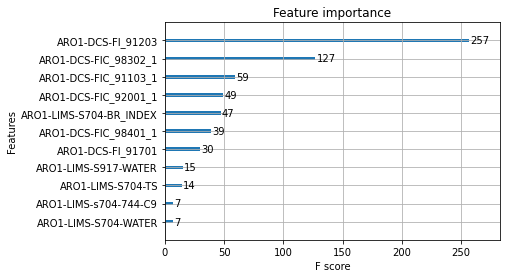

['ARO1-DCS-FI_91701', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FI_91203', 'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-FIC_92001_1', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-S916-WATER', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S917-WATER'] : ARO1-DCS-PDI_91202
[01:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PDI_91202 驗證分數:'

0.8944558297435133

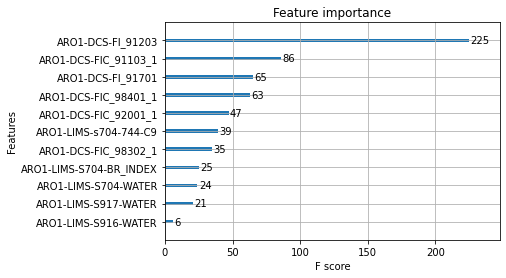

['ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_A_FA', 'ARO1-LIMS-s704-744-C9', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-FI_91203', 'ARO1-DCS-AC_L3_A', 'ARO1-LIMS-S704-WATER', 'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_XF', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-TS'] : ARO1-LIMS-s912-744-p-Xylene
[01:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s912-744-p-Xylene 驗證分數:'

-0.9897109812695986

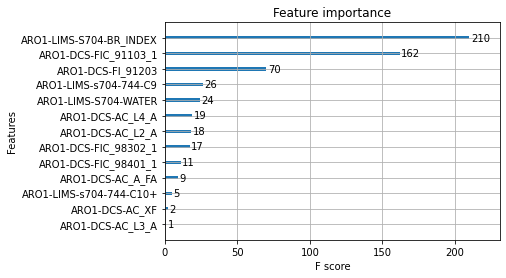

['ARO1-LIMS-s704-744-C9', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_L4_A', 'ARO1-LIMS-S916-WATER', 'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-AC_A_FA', 'ARO1-LIMS-S704-TS', 'ARO1-DCS-FI_91203', 'ARO1-LIMS-S704-WATER', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_91103_1', 'ARO1-LIMS-S917-WATER', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_XF', 'ARO1-LIMS-s704-744-C10+'] : ARO1-LIMS-s912-744-m-Xylene
[01:10:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s912-744-m-Xylene 驗證分數:'

0.8553459392403013

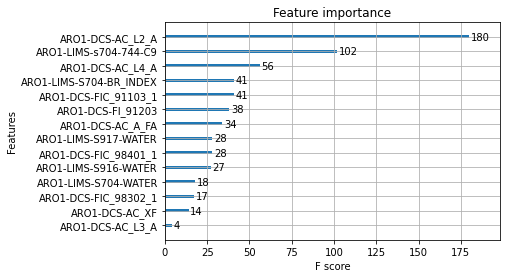

['ARO1-LIMS-s704-744-C9', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_A_FA', 'ARO1-DCS-AC_L3_A', 'ARO1-LIMS-S704-TS', 'ARO1-DCS-AC_XF', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-S704-WATER', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-AC_HF', 'ARO1-DCS-FI_91203', 'ARO1-LIMS-s704-744-C10+', 'ARO1-DCS-FIC_98302_1'] : ARO1-LIMS-s917-744-p-Xylene
[01:10:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s917-744-p-Xylene 驗證分數:'

0.10431244536771866

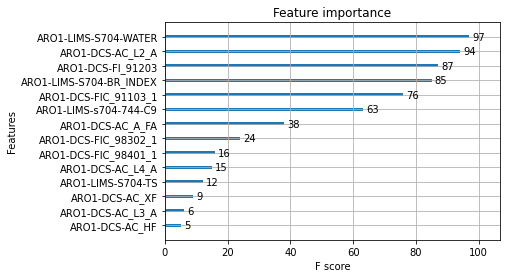

['ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-s704-744-C9', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_A_FA', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FI_91203', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C10+', 'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_XF'] : ARO1-LIMS-s916-744-p-Xylene
[01:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s916-744-p-Xylene 驗證分數:'

-0.11951691497773664

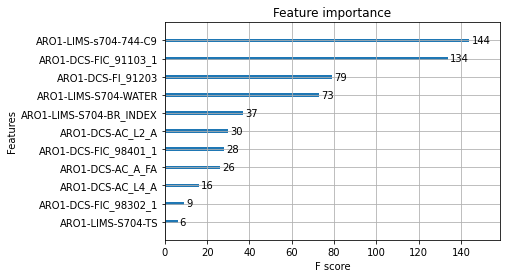

['ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-FI_91203', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-S704-TS', 'ARO1-DCS-AC_XF', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_A_FA'] : ARO1-DCS-PX 回收率
[01:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PX 回收率 驗證分數:'

-1.4588856547315503

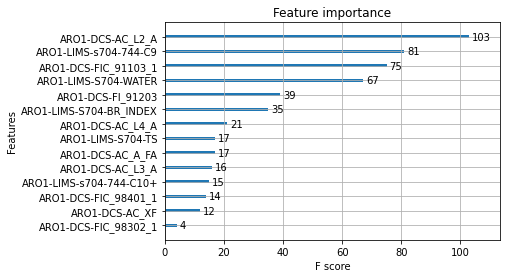

In [51]:
XGBOOST(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91102')
XGBOOST(data = df_2, dic = dic, x_col = x_col[:13], y_col = 'ARO1-DCS-PDI_91202')
XGBOOST(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s912-744-p-Xylene')
XGBOOST(data = df_2, dic = dic, x_col = x_col[0:4] + x_col[6:], y_col = "ARO1-LIMS-s912-744-m-Xylene")
XGBOOST(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s917-744-p-Xylene')
XGBOOST(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-LIMS-s916-744-p-Xylene')
XGBOOST(data = df_2, dic = dic, x_col = s_col[0:4] + s_col[6:11] + a_col, y_col = 'ARO1-DCS-PX 回收率')